In [ ]:
# Install necessary libraries
!pip install -q sentence-transformers scikit-learn matplotlib


In [ ]:
# Import required libraries
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Step 1: Define a dataset of documents
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "A fox is a wild animal.",
    "Dogs are domesticated animals and great companions.",
    "Machine learning is transforming the world.",
    "Artificial intelligence and deep learning are key topics.",
    "The field of AI is growing rapidly with advancements in technology.",
    "Cooking is both an art and a science.",
    "Recipes are essential for preparing delicious meals.",
    "Baking requires precision and creativity.",
    "Sports like football and basketball are popular worldwide.",
    "The Olympics brings together athletes from all over the globe.",
    "Exercise is important for maintaining a healthy lifestyle."
]

In [ ]:
# Step 2: Load a pre-trained LLM embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
# Step 3: Generate embeddings for the documents
embeddings = model.encode(documents)

In [ ]:
# Step 4: Perform clustering using KMeans
num_clusters = 3  # Adjust this to your dataset and use-case
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)
labels = kmeans.labels_

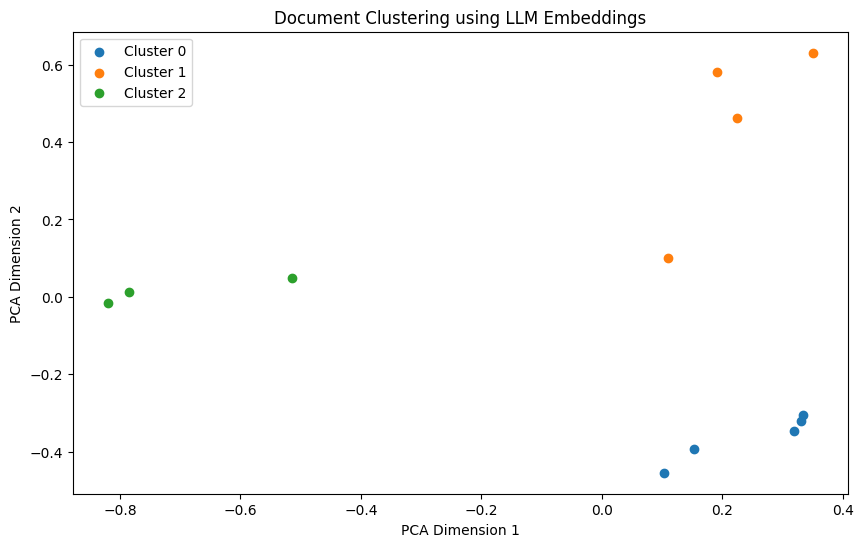

In [ ]:
# Step 5: Visualize the clustering (reduce dimensionality to 2D using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_points = reduced_embeddings[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.legend()
plt.title('Document Clustering using LLM Embeddings')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()


In [ ]:
# Step 6: Analyze results
clustered_docs = pd.DataFrame({'Document': documents, 'Cluster': labels})
print("Clustered Documents:")
print(clustered_docs)

Clustered Documents:
                                             Document  Cluster
0        The quick brown fox jumps over the lazy dog.        2
1                             A fox is a wild animal.        2
2   Dogs are domesticated animals and great compan...        2
3         Machine learning is transforming the world.        0
4   Artificial intelligence and deep learning are ...        0
5   The field of AI is growing rapidly with advanc...        0
6               Cooking is both an art and a science.        1
7   Recipes are essential for preparing delicious ...        1
8           Baking requires precision and creativity.        1
9   Sports like football and basketball are popula...        0
10  The Olympics brings together athletes from all...        0
11  Exercise is important for maintaining a health...        1
